In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from riverswim import RiverSwim
from forked_riverswim import ForkedRiverSwim
from scipy.special import rel_entr
from new_mdp_description import MDPDescription2
from utils import policy_evaluation
import multiprocessing as mp
import torch
from scipy.stats import t

def TV(p,q):
    return np.sum(np.abs(p-q), -1) * 0.5

def CE(x, c=0.95):
    N = x.shape[0]
    alpha = c + (1-c)/2
    c = t.ppf(alpha, N)
    s = np.std(x, axis=0, ddof=1)
    return x.mean(0), c * s/ np.sqrt(N)

fname_riverswim = 'data_riverswim50_2.pkl'
with open(fname_riverswim, 'rb') as f:
    data_riverswim = pickle.load(f)

# fname_forked_riverswim = 'data_forked_riverswim50_2.pkl'
# with open(fname_forked_riverswim, 'rb') as f:
#     data_forked_riverswim = pickle.load(f)
    
compute_dist_omega = lambda x,y: TV(x,y)
compute_dist_value = lambda V, mdp: np.linalg.norm(V -mdp.V_greedy[np.newaxis, np.newaxis], axis=-1)




/home/alessio/anaconda3/envs/maze-exploration/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import matplotlib as mpl
TITLE_SIZE = 24
LEGEND_SIZE = 15
TICK_SIZE = 15
AXIS_TITLE = TITLE_SIZE-4
AXIS_LABEL = 18
FONT_SIZE = TITLE_SIZE-4


plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=AXIS_TITLE)     # fontsize of the axes title
plt.rc('axes', labelsize=AXIS_LABEL)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE)  # fontsize of the figure title

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "pgf.preamble": [
        "\\usepackage{units}",  # load additional packages
        "\\usepackage{metalogo}",
        "\\usepackage{unicode-math}",  # unicode math setup
        r"\setmathfont{xits-math.otf}",
        r'\usepackage{amsmath}',
        r"\setmainfont{DejaVu Serif}",  # serif font via preamble
        r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
        r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
        r'\usepackage{helvet}',    # set the normal font here
        r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
        r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
    ]
})

In [ ]:
def get_data(data, key: str):
    data_ret = []
    num_visits = []
    policies = []
    last_visit = []
    visits = []
    for i in range(data['N_SIMS']):
        _data, _greedy_policy, _num_visits, _last_visit, _visits = zip(*data[key][i])
        data_ret.append(_data)
        num_visits.append(_num_visits)
        policies.append(_greedy_policy)
        last_visit.append(_last_visit)
        visits.append(_visits)
    if isinstance(data_ret[0][0], torch.Tensor):
        data_ret = []
    
    return np.array(data_ret), np.array(policies), np.array(num_visits),  np.array(last_visit), np.array(visits)

def compute_value(policies, env):
    value = np.zeros_like(policies)
    for i in range(policies.shape[0]):
        for t in range(policies.shape[1]):
            value[i,t] = policy_evaluation(data_riverswim['GAMMA'], env.transitions, env.rewards[..., np.newaxis], policies[i,t])
    return value


In [2]:
env = RiverSwim(data_riverswim['RIVER_LENGTH'], data_riverswim['MIN_REWARD'], data_riverswim['MAX_REWARD_1'])
true_mdp = MDPDescription2(env.transitions, env.rewards[..., np.newaxis], data_riverswim['GAMMA'], 1)
true_omega, _ = true_mdp.compute_allocation(navigation_constraints=True)

In [8]:
data_riverswim.keys()
for key in data_riverswim.keys():
    if 'eval' not in key and 'value' not in key:
        print(f'{key} - {data_riverswim[key]}')

GAMMA - 0.99
RIVER_LENGTH - 5
T - 10000
MIN_REWARD - 0.01
MAX_REWARD_1 - 1
MAX_REWARD_2 - 0.95
N_SIMS - 50
FREQUENCY_COMPUTATION - 50
ALPHA - 0.25
ETA1 - 0.6
ETA2 - 0.7


In [ ]:
#omega_onpolicy, greedy_onpolicy, freq_visits_onpolicy, last_visit_onpolicy, visits_onpolicy = get_data(data_riverswim, 'eval_onpolicy')

omega_mbbpi, greedy_mbbpi, freq_visits_mbbpi, last_visit_mbbpi, visits_mbbpi = get_data(data_riverswim, 'eval_mbbpi')
omega_mbbpi_bayes, greedy_mbbpi_bayes, freq_visits_mbbpi_bayes, last_visit_mbbpi_bayes, visits_mbbpi_bayes = get_data(data_riverswim, 'eval_mbbpi_bayes')
omega_mfbpi, greedy_mfbpi, freq_visits_mfbpi, last_visit_mfbpi, visits_mbbpi = get_data(data_riverswim, 'eval_mfbpi')
omega_mfbpi_gen, greedy_mfbpi_gen, freq_visits_mfbpi_gen, last_visit_mfbpi_gen, visits_mfbpi_gen = get_data(data_riverswim, 'eval_mfbpi_gen')
omega_mfbpi_proj, greedy_mfbpi_proj, freq_visits_mfbpi_proj, last_visit_mfbpi_proj, visits_mbbpi_proj = get_data(data_riverswim, 'eval_mfbpi_projected')



_, greedy_q, freq_visits_q, last_visit_q, visits_qlearning = get_data(data_riverswim, 'eval_qlearning')
_, greedy_qucb, freq_visits_qucb, last_visit_qucb, visits_qucb = get_data(data_riverswim, 'eval_qucb')

idxs = np.argwhere(np.array(range(data_riverswim['T'])) % data_riverswim['FREQUENCY_COMPUTATION'] == 0).flatten()
omega_mfbpi = omega_mfbpi[:, idxs, ...].reshape(data_riverswim['N_SIMS'], len(idxs), -1)
omega_mfbpi_gen = omega_mfbpi_gen[:, idxs, ...].reshape(data_riverswim['N_SIMS'], len(idxs), -1)
omega_mfbpi_proj = omega_mfbpi_proj[:, idxs, ...].reshape(data_riverswim['N_SIMS'], len(idxs), -1)
omega_mbbpi = omega_mbbpi[:, idxs, ...].reshape(data_riverswim['N_SIMS'], len(idxs), -1)
omega_mbbpi_bayes = omega_mbbpi_bayes[:, idxs, ...].reshape(data_riverswim['N_SIMS'], len(idxs), -1)

dist_omega_mbbpi = compute_dist_omega(omega_mbbpi, true_omega.flatten()[np.newaxis, np.newaxis, ...])
dist_omega_mfbpi = compute_dist_omega(omega_mfbpi, true_omega.flatten()[np.newaxis, np.newaxis, ...])
dist_omega_mfbpi_gen = compute_dist_omega(omega_mfbpi_gen, true_omega.flatten()[np.newaxis, np.newaxis, ...])
dist_omega_mfbpi_proj = compute_dist_omega(omega_mfbpi_proj, true_omega.flatten()[np.newaxis, np.newaxis, ...])
dist_omega_mbbpi_bayes = compute_dist_omega(omega_mbbpi_bayes, true_omega.flatten()[np.newaxis, np.newaxis, ...])


In [ ]:
U = true_mdp.evaluate_allocation(true_omega)

def eval_allocations(allocation):
    eval_x = np.zeros((allocation.shape[0], allocation.shape[1]))
    for i in range(allocation.shape[0]):
        for j in range(allocation.shape[1]):
            eval_x[i,j] = true_mdp.evaluate_allocation(allocation[i,j].reshape(-1, 2))
            if np.isinf(eval_x[i,j]):
                eps = 1e-3
                U = np.ones_like(allocation[i,j].reshape(-1, 2)) / np.prod(allocation[i,j].shape)
                omega = (1-eps) * allocation[i,j].reshape(-1, 2) + eps * U
                eval_x[i,j] = true_mdp.evaluate_allocation(omega)
    return eval_x

U_omega_mbbpi = eval_allocations(omega_mbbpi)
U_omega_mfbpi = eval_allocations(omega_mfbpi)
U_omega_mbbpi_bayes = eval_allocations(omega_mbbpi_bayes)
U_omega_mfbpi_proj = eval_allocations(omega_mfbpi_proj)


In [2]:

greedy_mbbpi = greedy_mbbpi[:, idxs, ...]
value_mbbpi = data_riverswim['value_mbbpi'] if 'value_mbbpi' in data_riverswim else compute_value(greedy_mbbpi, env)
dist_value_mbbpi = compute_dist_value(value_mbbpi, true_mdp)


greedy_mbbpi_bayes = greedy_mbbpi_bayes[:, idxs, ...]
value_mbbpi_bayes = data_riverswim['value_mbbpi_bayes'] if 'value_mbbpi_bayes' in data_riverswim else compute_value(greedy_mbbpi_bayes, env)
dist_value_mbbpi_bayes = compute_dist_value(value_mbbpi_bayes, true_mdp)

greedy_mfbpi = greedy_mfbpi[:, idxs, ...]
value_mfbpi = data_riverswim['value_mfbpi'] if 'value_mfbpi' in data_riverswim else compute_value(greedy_mfbpi, env)
dist_value_mfbpi = compute_dist_value(value_mfbpi, true_mdp)

greedy_mfbpi_gen = greedy_mfbpi_gen[:, idxs, ...]
value_mfbpi_gen = data_riverswim['value_mfbpi_gen'] if 'value_mfbpi_gen' in data_riverswim else compute_value(greedy_mfbpi_gen, env)
dist_value_mfbpi_gen = compute_dist_value(value_mfbpi_gen, true_mdp)


greedy_mfbpi_proj = greedy_mfbpi_proj[:, idxs, ...]
value_mfbpi_proj = data_riverswim['value_mfbpi_proj'] if 'value_mfbpi_proj' in data_riverswim else compute_value(greedy_mfbpi_proj, env)
dist_value_mfbpi_proj = compute_dist_value(value_mfbpi_proj, true_mdp)

greedy_q = greedy_q[:, idxs, ...]
value_q = data_riverswim['value_q'] if 'value_q' in data_riverswim else compute_value(greedy_q, env)
dist_value_q = compute_dist_value(value_q, true_mdp)


greedy_qucb = greedy_qucb[:, idxs, ...]
value_qucb = data_riverswim['value_qucb'] if 'value_qucb' in data_riverswim else compute_value(greedy_qucb, env)
dist_value_qucb = compute_dist_value(value_qucb, true_mdp)


# greedy_onpolicy = greedy_onpolicy[:, idxs, ...]
# value_onpolicy = compute_value(greedy_onpolicy, env)
# value_onpolicy = compute_dist_value(value_onpolicy, true_mdp)

if 'value_mbbpi' not in data_riverswim:
    data_riverswim['value_mbbpi'] = value_mbbpi
if 'value_mbbpi_bayes' not in data_riverswim:
    data_riverswim['value_mbbpi_bayes'] = value_mbbpi_bayes
if 'value_mfbpi_gen' not in data_riverswim:
    data_riverswim['value_mfbpi_gen'] = value_mfbpi_gen
if 'value_mfbpi_proj' not in data_riverswim:
    data_riverswim['value_mfbpi_proj'] = value_mfbpi_proj
if 'value_q' not in data_riverswim:
    data_riverswim['value_q'] = value_q
if 'value_qucb' not in data_riverswim:
    data_riverswim['value_qucb'] = value_qucb
    
with open(fname_riverswim, 'wb') as f:
    pickle.dump(data_riverswim, f, protocol = pickle.HIGHEST_PROTOCOL)


NameError: name 'greedy_mbbpi' is not defined

0.0002 - 0.0
-0.0002005937575222659 - 0.14312568743125686
-0.00020013609254292917 - 0.11394860513948606
-0.00020075483819160042 - 0.11360863913608639
0.0002 - 0.0
-0.00020134498449643617 - 0.15112488751124886
-0.00020065010634455634 - 0.07467253274672533
0.0019747235387045817 - 0.01905809419058094


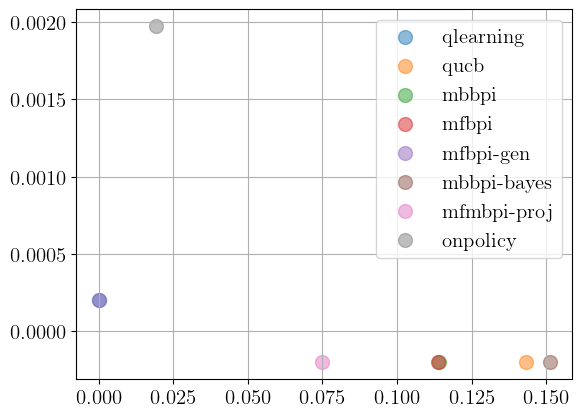

In [61]:
freq_visits = [('qlearning', freq_visits_q, last_visit_q),
               ('qucb', freq_visits_qucb, last_visit_qucb),
               ('mbbpi', freq_visits_mbbpi, last_visit_mbbpi),
               ('mfbpi', freq_visits_mfbpi, last_visit_mfbpi),
               ('mfbpi-gen', freq_visits_mfbpi_gen, last_visit_mfbpi_gen),
               ('mbbpi-bayes', freq_visits_mbbpi_bayes, last_visit_mbbpi_bayes),
               ('mfmbpi-proj', freq_visits_mfbpi_proj, last_visit_mfbpi_proj),
               ('onpolicy', freq_visits_onpolicy, last_visit_onpolicy)]

for name, visits, last_visit in freq_visits:
    visits = visits / visits.sum(-1, keepdims=True)
  
    last_visit = 5000-last_visit[:, -1, :]
    print(f'{1/last_visit.mean(0)[-1]} - {visits.mean(0)[-1,-1]}')
    x = visits.mean(0)[-1,-1]
    y = 1/last_visit.mean(0)[-1]
    
    plt.scatter(x, y,  s=100, alpha=0.5, label=name)
    
plt.legend()
plt.grid()

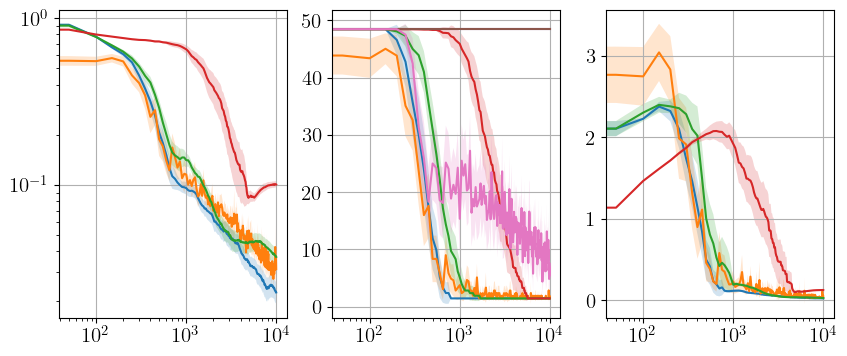

In [104]:
fig, ax = plt.subplots(1,3, figsize=(10,4))

x = range(0, data_riverswim['T'], data_riverswim['FREQUENCY_COMPUTATION'])
mu, ce = CE(dist_omega_mbbpi)
ax[0].plot(x, mu, label='Model-based')
ax[0].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(dist_omega_mbbpi_bayes)
ax[0].plot(x, mu, label='Model-based bayes')
ax[0].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(dist_omega_mfbpi)
ax[0].plot(x, mu, label='Model-free')
ax[0].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(dist_omega_mfbpi_proj)
ax[0].plot(x, mu, label='Model-free projected')
ax[0].fill_between(x, mu-ce, mu+ce, alpha=0.2)


ax[0].set_yscale('log')
#ax[0].legend()
ax[0].grid()

mu, ce = CE(dist_value_mbbpi)
ax[1].plot(x, mu, label='Model-based')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(dist_value_mbbpi_bayes)
ax[1].plot(x, mu, label='Model-based bayes')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(dist_value_mfbpi)
ax[1].plot(x, mu, label='Model-free')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(dist_value_mfbpi_proj)
ax[1].plot(x, mu, label='Model-free projected')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(dist_value_mfbpi_gen)
ax[1].plot(x, mu, label='Model-free generative')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(dist_value_q)
ax[1].plot(x, mu, label='Q-learning')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)


mu, ce = CE(dist_value_qucb)
ax[1].plot(x, mu, label='Qucb')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

# mu, ce = compute_ce(value_onpolicy)
# ax[1].plot(x, mu, label='onpolicy')
# ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

#ax[1].legend()
ax[1].grid()




mu, ce = CE(np.log10(U_omega_mbbpi  / U))
ax[2].plot(x, mu, label='Model-based')
ax[2].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(np.log10((U_omega_mbbpi_bayes ) / U))
ax[2].plot(x, mu, label='Model-based bayes')
ax[2].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(np.log10((U_omega_mfbpi ) / U))
ax[2].plot(x, mu, label='Model-free')
ax[2].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = CE(np.log10((U_omega_mfbpi_proj ) / U))
ax[2].plot(x, mu, label='Model-free projected')
ax[2].fill_between(x, mu-ce, mu+ce, alpha=0.2)

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')
#ax[2].set_yscale('log')
#ax[2].legend()
ax[2].grid()
plt.show()

In [98]:
U_omega_mbbpi_bayes.max()

740755970617.3306

In [4]:
env = ForkedRiverSwim(
    data_forked_riverswim['RIVER_LENGTH'], data_forked_riverswim['MIN_REWARD'], data_forked_riverswim['MAX_REWARD_1'], data_forked_riverswim['MAX_REWARD_2'])
true_mdp = MDPDescription2(env.transitions, env.rewards[..., np.newaxis], data_riverswim['GAMMA'], 1)
true_omega, _ = true_mdp.compute_allocation(navigation_constraints=True)

In [5]:
#omega_onpolicy, greedy_onpolicy, freq_visits_onpolicy, last_visit_onpolicy, visits_onpolicy = get_data(data_riverswim, 'eval_onpolicy')

omega_mbbpi, greedy_mbbpi, freq_visits_mbbpi, last_visit_mbbpi, visits_mbbpi = get_data(data_forked_riverswim, 'eval_mbbpi')
omega_mbbpi_bayes, greedy_mbbpi_bayes, freq_visits_mbbpi_bayes, last_visit_mbbpi_bayes, visits_mbbpi_bayes = get_data(data_forked_riverswim, 'eval_mbbpi_bayes')
omega_mfbpi, greedy_mfbpi, freq_visits_mfbpi, last_visit_mfbpi, visits_mbbpi = get_data(data_forked_riverswim, 'eval_mfbpi')
omega_mfbpi_gen, greedy_mfbpi_gen, freq_visits_mfbpi_gen, last_visit_mfbpi_gen, visits_mfbpi_gen = get_data(data_forked_riverswim, 'eval_mfbpi_gen')
omega_mfbpi_proj, greedy_mfbpi_proj, freq_visits_mfbpi_proj, last_visit_mfbpi_proj, visits_mbbpi_proj = get_data(data_forked_riverswim, 'eval_mfbpi_projected')



_, greedy_q, freq_visits_q, last_visit_q, visits_qlearning = get_data(data_forked_riverswim, 'eval_qlearning')
_, greedy_qucb, freq_visits_qucb, last_visit_qucb, visits_qucb = get_data(data_forked_riverswim, 'eval_qucb')

idxs = np.argwhere(np.array(range(data_forked_riverswim['T'])) % data_forked_riverswim['FREQUENCY_COMPUTATION'] == 0).flatten()
omega_mfbpi = omega_mfbpi[:, idxs, ...].reshape(data_forked_riverswim['N_SIMS'], len(idxs), -1)
omega_mfbpi_gen = omega_mfbpi_gen[:, idxs, ...].reshape(data_forked_riverswim['N_SIMS'], len(idxs), -1)
omega_mfbpi_proj = omega_mfbpi_proj[:, idxs, ...].reshape(data_forked_riverswim['N_SIMS'], len(idxs), -1)
omega_mbbpi = omega_mbbpi[:, idxs, ...].reshape(data_forked_riverswim['N_SIMS'], len(idxs), -1)
omega_mbbpi_bayes = omega_mbbpi_bayes[:, idxs, ...].reshape(data_forked_riverswim['N_SIMS'], len(idxs), -1)

dist_omega_mbbpi = compute_dist_omega(omega_mbbpi, true_omega.flatten()[np.newaxis, np.newaxis, ...])
dist_omega_mfbpi = compute_dist_omega(omega_mfbpi, true_omega.flatten()[np.newaxis, np.newaxis, ...])
dist_omega_mfbpi_gen = compute_dist_omega(omega_mfbpi_gen, true_omega.flatten()[np.newaxis, np.newaxis, ...])
dist_omega_mfbpi_proj = compute_dist_omega(omega_mfbpi_proj, true_omega.flatten()[np.newaxis, np.newaxis, ...])
dist_omega_mbbpi_bayes = compute_dist_omega(omega_mbbpi_bayes, true_omega.flatten()[np.newaxis, np.newaxis, ...])


In [6]:
U = true_mdp.evaluate_allocation(true_omega)

def eval_allocations(allocation):
    eval_x = np.zeros((allocation.shape[0], allocation.shape[1]))
    for i in range(allocation.shape[0]):
        for j in range(allocation.shape[1]):
            eval_x[i,j] = true_mdp.evaluate_allocation(allocation[i,j].reshape(-1, 3))
        if np.isinf(eval_x[i,j]):
                eps = 1e-3
                U = np.ones_like(allocation[i,j].reshape(-1, 3)) / np.prod(allocation[i,j].shape)
                omega = (1-eps) * allocation[i,j].reshape(-1, 3) + eps * U
                eval_x[i,j] = true_mdp.evaluate_allocation(omega)
    return eval_x

U_omega_mbbpi = eval_allocations(omega_mbbpi)
U_omega_mfbpi = eval_allocations(omega_mfbpi)
U_omega_mbbpi_bayes = eval_allocations(omega_mbbpi_bayes)
U_omega_mfbpi_proj = eval_allocations(omega_mfbpi_proj)


In [7]:

greedy_mbbpi = greedy_mbbpi[:, idxs, ...]
value_mbbpi = data_forked_riverswim['value_mbbpi'] if 'value_mbbpi' in data_forked_riverswim else compute_value(greedy_mbbpi, env)
dist_value_mbbpi = compute_dist_value(value_mbbpi, true_mdp)


greedy_mbbpi_bayes = greedy_mbbpi_bayes[:, idxs, ...]
value_mbbpi_bayes = data_forked_riverswim['value_mbbpi_bayes'] if 'value_mbbpi_bayes' in data_forked_riverswim else compute_value(greedy_mbbpi_bayes, env)
dist_value_mbbpi_bayes = compute_dist_value(value_mbbpi_bayes, true_mdp)

greedy_mfbpi = greedy_mfbpi[:, idxs, ...]
value_mfbpi = data_forked_riverswim['value_mfbpi'] if 'value_mfbpi' in data_forked_riverswim else compute_value(greedy_mfbpi, env)
dist_value_mfbpi = compute_dist_value(value_mfbpi, true_mdp)

greedy_mfbpi_gen = greedy_mfbpi_gen[:, idxs, ...]
value_mfbpi_gen = data_forked_riverswim['value_mfbpi_gen'] if 'value_mfbpi_gen' in data_forked_riverswim else compute_value(greedy_mfbpi_gen, env)
dist_value_mfbpi_gen = compute_dist_value(value_mfbpi_gen, true_mdp)


greedy_mfbpi_proj = greedy_mfbpi_proj[:, idxs, ...]
value_mfbpi_proj = data_forked_riverswim['value_mfbpi_proj'] if 'value_mfbpi_proj' in data_forked_riverswim else compute_value(greedy_mfbpi_proj, env)
dist_value_mfbpi_proj = compute_dist_value(value_mfbpi_proj, true_mdp)

greedy_q = greedy_q[:, idxs, ...]
value_q = data_forked_riverswim['value_q'] if 'value_q' in data_forked_riverswim else compute_value(greedy_q, env)
dist_value_q = compute_dist_value(value_q, true_mdp)


greedy_qucb = greedy_qucb[:, idxs, ...]
value_qucb = data_forked_riverswim['value_qucb'] if 'value_qucb' in data_forked_riverswim else compute_value(greedy_qucb, env)
dist_value_qucb = compute_dist_value(value_qucb, true_mdp)


# greedy_onpolicy = greedy_onpolicy[:, idxs, ...]
# value_onpolicy = compute_value(greedy_onpolicy, env)
# value_onpolicy = compute_dist_value(value_onpolicy, true_mdp)

if 'value_mbbpi' not in data_forked_riverswim:
    data_forked_riverswim['value_mbbpi'] = value_mbbpi
if 'value_mbbpi_bayes' not in data_forked_riverswim:
    data_forked_riverswim['value_mbbpi_bayes'] = value_mbbpi_bayes
if 'value_mfbpi_gen' not in data_forked_riverswim:
    data_forked_riverswim['value_mfbpi_gen'] = value_mfbpi_gen
if 'value_mfbpi_proj' not in data_forked_riverswim:
    data_forked_riverswim['value_mfbpi_proj'] = value_mfbpi_proj
if 'value_q' not in data_forked_riverswim:
    data_forked_riverswim['value_q'] = value_q
if 'value_qucb' not in data_forked_riverswim:
    data_forked_riverswim['value_qucb'] = value_qucb
    
with open(fname_forked_riverswim, 'wb') as f:
    pickle.dump(data_forked_riverswim, f, protocol = pickle.HIGHEST_PROTOCOL)


: 

: 

qlearning - [9.84201580e-01 1.47385261e-02 1.99980002e-04 1.99980002e-05
 1.99980002e-05 7.99920008e-04 1.99980002e-05 0.00000000e+00
 0.00000000e+00]
qucb - [0.14168583 0.08985101 0.09283072 0.13112689 0.07679232 0.13536646
 0.11264874 0.14606539 0.07363264]
mbbpi - [0.1310469  0.06407359 0.08009199 0.16664334 0.07413259 0.13868613
 0.10024998 0.17764224 0.06743326]
mfbpi - [0.1489651  0.07969203 0.08925107 0.14864514 0.07065293 0.14188581
 0.10522948 0.15352465 0.06215378]
mfbpi-gen - [9.81241876e-01 1.63983602e-02 5.79942006e-04 3.99960004e-05
 1.99980002e-05 1.59984002e-03 9.99900010e-05 1.99980002e-05
 0.00000000e+00]
mbbpi-bayes - [0.09787021 0.05125487 0.07547245 0.18222178 0.07955204 0.13584642
 0.10568943 0.1970203  0.07507249]
mfmbpi-proj - [0.24291571 0.07849215 0.09637036 0.17352265 0.08073193 0.14670533
 0.10018998 0.06521348 0.01585841]


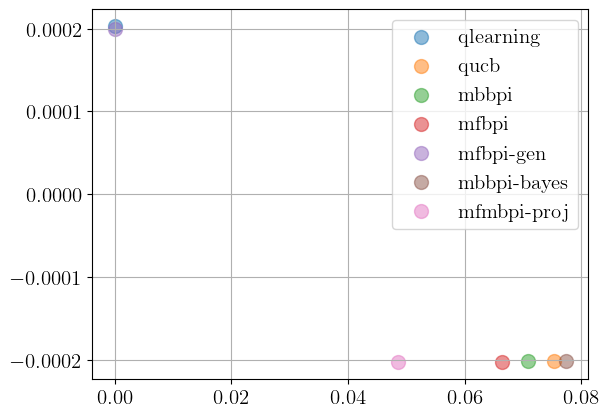

In [65]:
freq_visits = [('qlearning', freq_visits_q, last_visit_q),
               ('qucb', freq_visits_qucb, last_visit_qucb),
               ('mbbpi', freq_visits_mbbpi, last_visit_mbbpi),
               ('mfbpi', freq_visits_mfbpi, last_visit_mfbpi),
               ('mfbpi-gen', freq_visits_mfbpi_gen, last_visit_mfbpi_gen),
               ('mbbpi-bayes', freq_visits_mbbpi_bayes, last_visit_mbbpi_bayes),
               ('mfmbpi-proj', freq_visits_mfbpi_proj, last_visit_mfbpi_proj)]

V = true_mdp.V_greedy
for name, visits, last_visit in freq_visits:
    visits = (visits / visits.sum(-1, keepdims=True)).mean(0)

    x = (visits[-1,-1] * V[-1] + visits[-1, 4] * V[4]) / (V[-1] + V[4])
    last_visit2 = 5000-last_visit[:, -1, -1]
    last_visit1 = 5000-last_visit[:, -1, 4]
    y =  (last_visit1 * V[-1] + last_visit2 * V[4]).mean(0) / (V[-1] + V[4])
    print(f'{name} - {visits[-1]}')
    
    
    plt.scatter(x, 1/y,  s=100, alpha=0.5, label=name)
    
plt.legend()
plt.grid()

In [66]:
data_forked_riverswim['RIVER_LENGTH']

5

/tmp/ipykernel_63288/3687668501.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  axins.set_yticklabels([0, 5])


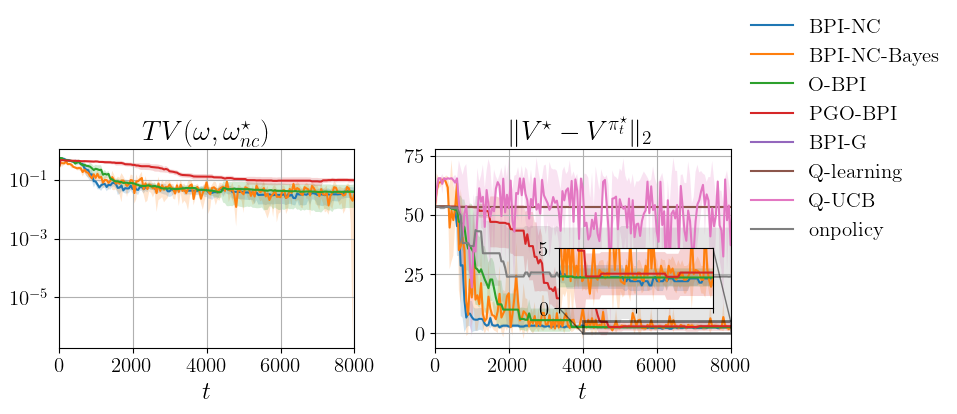

In [67]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

x = range(0, data_riverswim['T'], data_riverswim['FREQUENCY_COMPUTATION'])
mu, ce = compute_ce(omega_mbbpi)
ax[0].plot(x, mu, label='BPI-NC')
ax[0].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(omega_mbbpi_bayes)
ax[0].plot(x, mu, label='BPI-NC-Bayes')
ax[0].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(omega_mfbpi)
ax[0].plot(x, mu, label='O-BPI')
ax[0].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(omega_mfbpi_proj)
ax[0].plot(x, mu, label='PGO-BPI')
ax[0].fill_between(x, mu-ce, mu+ce, alpha=0.2)

ax[0].set_xbound((0, 8000))

ax[0].set_yscale('log')
#ax[0].legend()
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_title(r'$TV(\omega, \omega_{nc}^\star)$')

mu, ce = compute_ce(value_mbbpi)
ax[1].plot(x, mu, label='BPI-NC')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_mbbpi_bayes)
ax[1].plot(x, mu, label='BPI-NC-Bayes')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_mfbpi)
ax[1].plot(x, mu, label=r'O-BPI')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_mfbpi_proj)
ax[1].plot(x, mu, label='PGO-BPI')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_mfbpi_gen)
ax[1].plot(x, mu, label='BPI-G')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_q)
ax[1].plot(x, mu, label='Q-learning')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)


mu, ce = compute_ce(value_qucb)
ax[1].plot(x, mu, label='Q-UCB')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_onpolicy)
ax[1].plot(x, mu, label='onpolicy')
ax[1].fill_between(x, mu-ce, mu+ce, alpha=0.2)


ax[1].set_xbound((0, 8000))
ax[1].legend(bbox_to_anchor=(1.04, .5), borderaxespad=0, frameon=False)
ax[1].grid()

ax[1].set_title('$\|V^\star - V^{\pi_t^\star}\|_2$')
ax[1].set_xlabel('$t$')






# inset axes...
axins = ax[1].inset_axes([0.42, 0.2, 0.52, 0.3])
# subregion of the original image
x1, x2, y1, y2 = 4000, 8000, 0, 5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([0, 5])
axins.grid()
mu, ce = compute_ce(value_mbbpi)
axins.plot(x, mu)
axins.fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_mbbpi_bayes)
axins.plot(x, mu)
axins.fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_mfbpi)
axins.plot(x, mu)
axins.fill_between(x, mu-ce, mu+ce, alpha=0.2)

mu, ce = compute_ce(value_mfbpi_proj)
axins.plot(x, mu)
axins.fill_between(x, mu-ce, mu+ce, alpha=0.2)



ax[1].indicate_inset_zoom(axins, edgecolor="black",linewidth=2)





plt.tight_layout()
plt.savefig('./figures/forked_riverswim_performance.pdf')
plt.show()

In [68]:
value_mbbpi.shape

(5, 200)

In [69]:
true_mdp.pi_greedy

array([1, 2, 1, 1, 1, 1, 1, 2, 1])